In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('SHR76_16.csv')
df['StateName'] = df.StateName.apply(lambda x: x.replace('.',''))
df.head()

,ID,CNTYFIPS,Ori,State,Agency,Agentype,Source,Solved,Year,StateName,...,OffEthnic,Weapon,Relationship,Circumstance,Subcircum,VicCount,OffCount,FileDate,fstate,MSA
0,197601001AKASP00,"Juneau, AK",AKASP00,Alaska,State Troopers,Primary state LE,FBI,Yes,1976,ALASKA,...,Unknown or not reported,Knife or cutting instrument,Husband,Other arguments,NaN,0,0,30180,Alaska,Rural Alaska
1,197601001AL00102,"Jefferson, AL",AL00102,Alabama,Birmingham,Municipal police,FBI,Yes,1976,ALA,...,Unknown or not reported,Shotgun,Acquaintance,Felon killed by private citizen,Felon killed in commission of a crime,0,0,30180,Alabama,"Birmingham-Hoover, AL"
2,197601001AL00104,"Jefferson, AL",AL00104,Alabama,Fairfield,Municipal police,FBI,Yes,1976,ALA,...,Unknown or not reported,Shotgun,Wife,Other,NaN,0,0,30180,Alabama,"Birmingham-Hoover, AL"
3,197601001AL00106,"Jefferson, AL",AL00106,Alabama,Leeds,Municipal police,FBI,Yes,1976,ALA,...,Unknown or not reported,Knife or cutting instrument,Brother,Other arguments,NaN,0,0,30180,Alabama,"Birmingham-Hoover, AL"
4,197601001AL00201,"Mobile, AL",AL00201,Alabama,Mobile,Municipal police,FBI,Yes,1976,ALA,...,Unknown or not reported,Strangulation - hanging,Acquaintance,Circumstances undetermined,NaN,0,0,30180,Alabama,"Mobile, AL"


In [5]:
print("{:,}".format(df.shape[0]))

752,313


In [6]:
print('\n'.join(list(df.columns)))

ID
CNTYFIPS
Ori
State
Agency
Agentype
Source
Solved
Year
StateName
Month
Incident
ActionType
Homicide
Situation
VicAge
VicSex
VicRace
VicEthnic
OffAge
OffSex
OffRace
OffEthnic
Weapon
Relationship
Circumstance
Subcircum
VicCount
OffCount
FileDate
fstate
MSA


In [7]:
df.Solved.unique()

array(['Yes', 'No'], dtype=object)

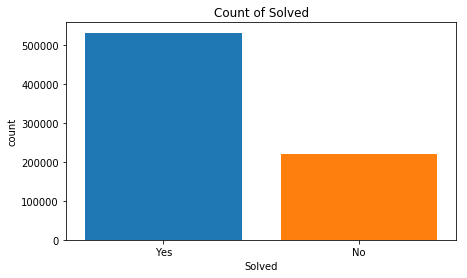

In [8]:
fig, ax = plt.subplots(figsize=(7,4))
sns.countplot(x='Solved',data=df,ax=ax,saturation=1)
ax.set_title('Count of Solved')
plt.show()

In [9]:
state_solved = df[['StateName','Solved','ID']].groupby(['StateName','Solved'],as_index=False).count()
state_solved.head()

,StateName,Solved,ID
0,ALA,No,3350
1,ALA,Yes,12337
2,ALASKA,No,362
3,ALASKA,Yes,1590
4,ARIZ,No,4066


In [10]:
state_pvt = df.pivot_table(values='ID',index='StateName',columns='Solved',aggfunc='count')

In [93]:
state_pvt['Solve_Rate'] = state_pvt['Yes'] / (state_pvt['Yes'] + state_pvt['No'])
state_pvt.sort_values(by='Solve_Rate',inplace=True,ascending=False)
state_pvt.head()

Solved,No,Yes,Solve_Rate
StateName,,,
N DAK,26,345,0.929919
S DAK,43,494,0.919926
MONT,68,734,0.915212
S C,1352,12624,0.903263
IDAHO,139,1291,0.902797


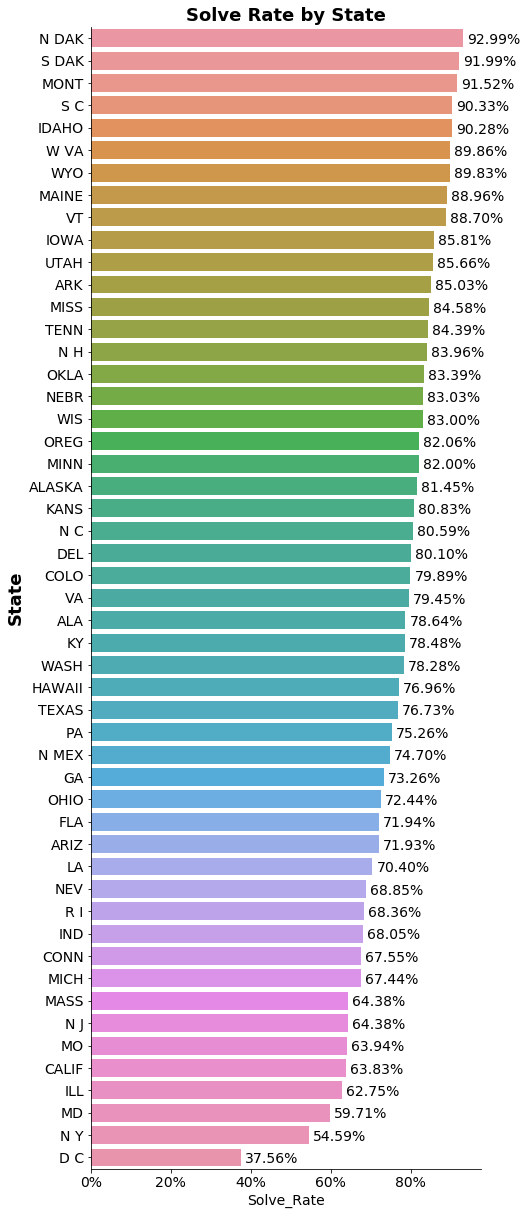

In [12]:
mpl.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(figsize=(7,21))
sns.barplot(x='Solve_Rate',y=state_pvt.index,data=state_pvt)
sns.despine(ax=ax)
ax.set_xticklabels(["{:.0%}".format(i) for i in ax.get_xticks()])
ax.set_ylabel('State',fontsize=18, fontweight='bold')
ax.set_title('Solve Rate by State',fontsize=18,fontweight='bold')
labels = ["{:.2%}".format(i) for i in state_pvt.Solve_Rate.values]
rects = ax.patches

for i, v in enumerate(state_pvt.Solve_Rate.values):
    ax.text(v+.01, i + .25, '{:.2%}'.format(v))
plt.show()

In [94]:
pvt_yr = pd.pivot_table(df, values='ID',index='Year', columns='Solved',aggfunc='count')
pvt_yr['All Murders'] = pvt_yr['No'] + pvt_yr['Yes']
pvt_yr['Solve Rate'] = pvt_yr['Yes'] / pvt_yr['All Murders']
pvt_yr.head()

Solved,No,Yes,All Murders,Solve Rate
Year,,,,
1976,3702,13917,17619,0.789886
1977,4616,14228,18844,0.755041
1978,4531,14992,19523,0.767915
1979,5669,16029,21698,0.738732
1980,6363,16729,23092,0.724450


In [98]:
# Bottom 5 Years by Solve Rate
pvt_yr.sort_values(by='Solve Rate').head()

Solved,No,Yes,All Murders,Solve Rate
Year,,,,
2016,6008,12014,18022,0.666630
1992,7912,15881,23793,0.667465
1993,7901,16435,24336,0.675337
2008,5057,10553,15610,0.676041
1991,7336,15321,22657,0.676215


In [99]:
# Top 5 years with most unsolved murders
pvt_yr.sort_values(by='No',ascending=False).head()

Solved,No,Yes,All Murders,Solve Rate
Year,,,,
1992,7912,15881,23793,0.667465
1993,7901,16435,24336,0.675337
1994,7365,15881,23246,0.683171
1991,7336,15321,22657,0.676215
1995,6809,14370,21179,0.678502


In [122]:
pvt_yr.sort_values(by='Yes',ascending=False).head()

Solved,No,Yes,All Murders,Solve Rate
Year,,,,
1980,6363,16729,23092,0.724450
1993,7901,16435,24336,0.675337
1979,5669,16029,21698,0.738732
1994,7365,15881,23246,0.683171
1992,7912,15881,23793,0.667465


In [123]:
pvt_yr.sort_values(by='All Murders',ascending=False).head()

Solved,No,Yes,All Murders,Solve Rate
Year,,,,
1993,7901,16435,24336,0.675337
1992,7912,15881,23793,0.667465
1994,7365,15881,23246,0.683171
1980,6363,16729,23092,0.724450
1991,7336,15321,22657,0.676215


In [120]:
top5_unsolved = pvt_yr.loc[1991:1995]

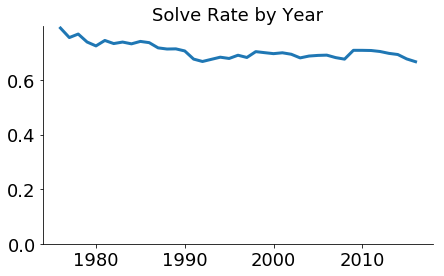

In [78]:
# quick plot of Solve Rate by Year
fig, ax = plt.subplots(figsize=(7,4))

ax.plot(pvt_yr.index, pvt_yr['Solve Rate'],linewidth=3)

ax.set_ylim(bottom=0)
ax.set_title('Solve Rate by Year',fontsize=18)
sns.despine(ax=ax)
plt.show()

In [58]:
# Credit for this cell to Randal Olson
# http://www.randalolson.com/2014/06/28/how-to-make-beautiful-data-visualizations-in-python-with-matplotlib/

# These are the "Tableau 20" colors as RGB.    
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.) 

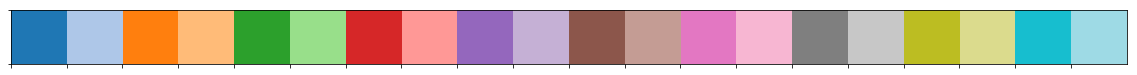

In [59]:
sns.palplot(tableau20)

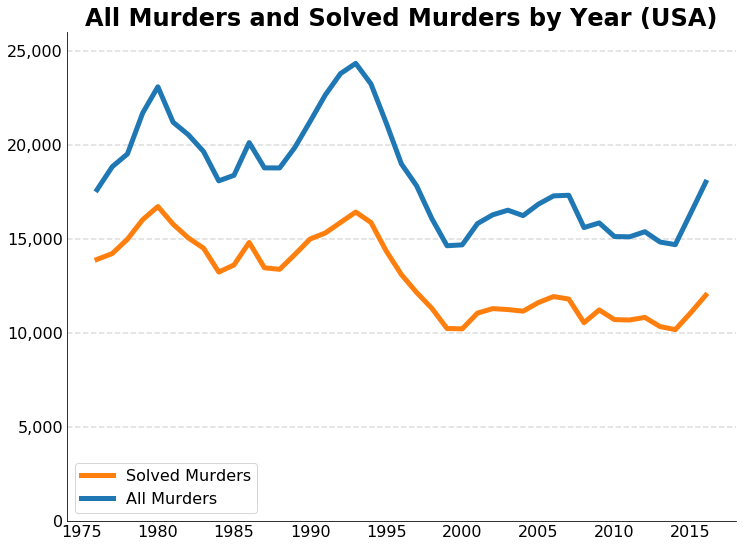

In [92]:
# set default font size to 16
mpl.rcParams.update({'font.size': 16})

# set up the figure
fig, ax = plt.subplots(figsize=(12,9))

# Create a light gray, dashed, horizontal line across the chart at the yaxis tick labels
for tick in range(5000,26000,5000):
    ax.axhline(tick,ls='dashed',c=tableau20[15],alpha=0.6)

# plot solved murders by year
solved, = ax.plot(pvt_yr.index, pvt_yr['Yes'],linewidth=5,c=tableau20[2])

# plot all murders by year
all_murders, = ax.plot(pvt_yr.index, pvt_yr['All Murders'],linewidth=5,c=tableau20[0])

# format the yaxis tick labels
ax.yaxis.set_ticklabels([f"{i:,.0f}" for i in range(0,26000,5000)])

# set the y axis limit to 0
ax.set_ylim(bottom=0)

# remove the top and right spines from the plot, ax.spines is a dictionary
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# remove the tick marks but keep the labels
ax.tick_params(axis='both', which='both', length=0) 

# Set the legend labels
solved.set_label('Solved Murders')
all_murders.set_label('All Murders')
ax.legend()

# set the title
ax.set_title('All Murders and Solved Murders by Year (USA)',fontsize=24,fontweight='bold')

# even thought we called %matplotlib inline, calling plt.show()
# will eliminate some junk printed out above the chart
plt.show()

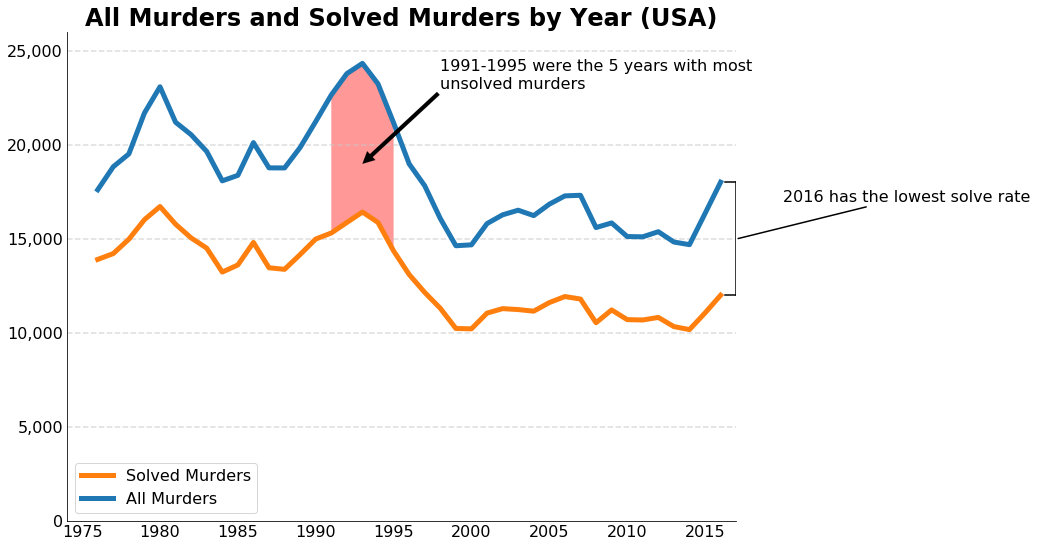

In [181]:
# set default font size to 16
mpl.rcParams.update({'font.size': 16})

# set up the figure
fig, ax = plt.subplots(figsize=(12,9))

# Create a light gray, dashed, horizontal line across the chart at the yaxis tick labels
for tick in range(5000,26000,5000):
    ax.axhline(tick,ls='dashed',c=tableau20[15],alpha=0.6)

# plot solved murders by year
solved, = ax.plot(pvt_yr.index, pvt_yr['Yes'],linewidth=5,c=tableau20[2])

# plot all murders by year
all_murders, = ax.plot(pvt_yr.index, pvt_yr['All Murders'],linewidth=5,c=tableau20[0])

# format the yaxis tick labels
ax.yaxis.set_ticklabels([f"{i:,.0f}" for i in range(0,26000,5000)])

# set the y axis limit to 0
ax.set_ylim(bottom=0)
ax.set_xlim(1974,2017)
# remove the top and right spines from the plot, ax.spines is a dictionary
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# remove the tick marks but keep the labels
ax.tick_params(axis='both', which='both', length=0) 

# Set the legend labels
solved.set_label('Solved Murders')
all_murders.set_label('All Murders')
ax.legend()

# set the title
ax.set_title('All Murders and Solved Murders by Year (USA)',fontsize=24,fontweight='bold')

# fill in between the lines of the 5 years with the most unsolved murders
ax.fill_between(top5_unsolved.index,top5_unsolved['All Murders'],
                top5_unsolved['Yes'],
                facecolor= tableau20[7])

# plot a large bracket at 2016, year with lowest Solve Rate
ax.plot((2017,2017),(12014,18024),c='black')
ax.plot((2016.3,2017),(12014,12014), c='black')
ax.plot((2016.3,2017),(18024,18024), c='black')
# annotate the chart
top5_annot = ax.annotate(s='1991-1995 were the 5 years with most\nunsolved murders',xy=(1993, 19000),xytext=(1998,23000),
           arrowprops=dict(linewidth=.1,facecolor='black',))
ax.annotate(s='2016 has the lowest solve rate',xy=(2017,15000),xytext=(2020,17000),
           arrowprops=dict(linewidth=1.5,facecolor='black',arrowstyle='-'))
# even thought we called %matplotlib inline, calling plt.show()
# will eliminate some junk printed out above the chart
plt.show()